In [19]:
import pandas as pd


schedulerTypes = [0,1,2,3,4]

comTime = []
# get complete time

for j in range(1,201):
    if (j==97 or j==188):
        continue
    c_time = []
    for i in schedulerTypes:
        dir = '../results-wns3/scheduler/scheduler-'+str(j)
        file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        # print(j)
        if (int(last_line.split('\t')[3]) > 5000000):
            c_time.append(float(last_line.split('\t')[0]))
        else:
            c_time.append(0)
    # c_time.append(r0)
    # c_time.append(r1)
    # if(d == ""):
    #     c_time.append("0") 
    # else:
    #     c_time.append(d)
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['RR', 'MRTT', 'BLEST', 'ECF', 'PEEK'])
print(dataTotal)


          RR      MRTT     BLEST       ECF      PEEK
0    13.4898   0.00000   0.00000  11.00720   0.00000
1     0.0000   9.10791  12.72260  10.76540   9.10791
2    12.9839  27.61220  27.61220  13.48420  27.61220
3    12.0734  11.07900  11.07900   9.61194  11.07900
4     0.0000  10.25640  10.25640   0.00000  12.08270
..       ...       ...       ...       ...       ...
193  12.1716   8.67616   9.74877  12.10520   8.67616
194   0.0000   0.00000   0.00000   0.00000   0.00000
195  16.2854   0.00000  12.94450   0.00000   0.00000
196  13.4930  10.56840   8.82055  12.73100  10.56840
197   0.0000  10.04890  11.28360  12.82410  10.04890

[198 rows x 5 columns]


In [20]:
toDrop = dataTotal.loc[dataTotal["BLEST"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["PEEK"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["MAB"] == 0.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)

In [21]:
## high dynamic

toDrop = dataTotal.loc[dataTotal["BLEST"] > 17.5].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] > 17.5].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] > 17.5].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] > 17.5].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["PEEK"] > 17.5].index.tolist()
dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["MAB"] > 10.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)

In [22]:
# toDrop =dataTotal.loc[dataTotal["MAB"] > 9.5].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["MRTT"] < 6.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["MRTT"] < 9.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["BLEST"] > 14.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop = dataTotal.loc[dataTotal["RR"] < 6.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["ECF"] > 14.0].index.tolist()
# dataTotal = dataTotal.drop(toDrop)
# toDrop =dataTotal.loc[dataTotal["MAB"] < 6].index.tolist()
# dataTotal = dataTotal.drop(toDrop)

dataTotal.count()


RR       60
MRTT     60
BLEST    60
ECF      60
PEEK     60
dtype: int64

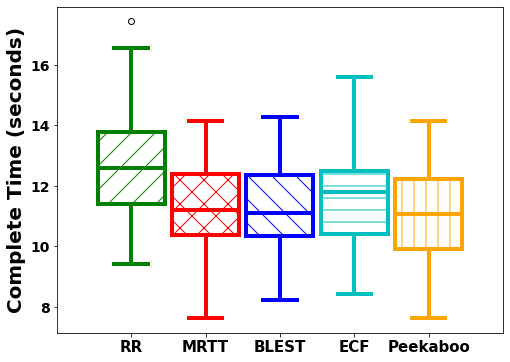

In [28]:
import matplotlib.pyplot as plt
import numpy as np

ct0 = [dataTotal['RR']]
ct1 = [dataTotal['MRTT']]
ct2 = [dataTotal['BLEST']]
ct3 = [dataTotal['ECF']]
ct4 = [dataTotal['PEEK']]
# ct5 = [dataTotal['MAB']]

# ticks = ['dynamic2']
bar_width = 0.9
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot

boxprops = dict(linestyle='-', linewidth=4)
whiskerprops = dict(linestyle='-', linewidth=4)
capprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)

plt.figure(figsize=(8,6))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0))),widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1*2,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1*3,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot3['boxes']:
    box.set(hatch = '-', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.1*4,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot4['boxes']:
    box.set(hatch = '|', fill=False) 
# ct_plot5 = plt.boxplot(ct5,positions=np.array(np.arange(len(ct5)))+bar_width*5+0.1*5,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
# for box in ct_plot5['boxes']:
#     box.set(hatch = '+', fill=False) 
    
    


def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    # plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'green', 'RR')
define_box_properties(ct_plot1, 'red', 'MRTT')
define_box_properties(ct_plot2, 'blue', 'BLEST')
define_box_properties(ct_plot3, 'c', 'ECF')
define_box_properties(ct_plot4, 'orange', 'PEEK')
# define_box_properties(ct_plot5, 'orange', 'MAB')
 
# set the x label values
ticks = ['RR', 'MRTT', 'BLEST', 'ECF', 'Peekaboo']
plt.xticks([0,1,2,3,4], ticks)
# plt.tick_params(labelbottom = False, bottom = False)
plt.xticks(fontsize=15, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=14, fontweight='bold')
plt.ylabel("Complete Time (seconds)", fontsize=20, fontweight='bold')
# plt.xlabel("Scheduler", fontsize=20, fontweight='bold')
# set the limit for x axis
plt.xlim(-1, len(ticks))
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
# plt.title('High Dynamicity')
plt.savefig('./comTime_scheduler.pdf', format='pdf')
plt.savefig('./comTime_scheduler.png', format='png')
plt.show()

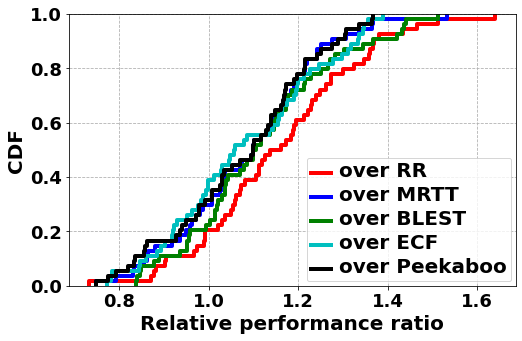

In [26]:

import seaborn as sns

plt.figure(figsize=(8,5))
# plt.title('High Dynamicity')
sns.ecdfplot(data = dataTotal['RR']/dataTotal['MAB'], label = "over RR", color='red', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['MRTT']/dataTotal['MAB'], label = "over MRTT", color='blue', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['BLEST']/dataTotal['MAB'], label = "over BLEST", color='green', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['ECF']/dataTotal['MAB'], label = "over ECF", color='c', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['PEEK']/dataTotal['MAB'], label = "over Peekaboo", color='black', linewidth=4, linestyle="-")

# sns.kdeplot(data = dataTotal['RR']/dataTotal['MAB'], cumulative = True, label = "over RR")
# sns.kdeplot(data = dataTotal['MRTT']/dataTotal['MAB'], cumulative = True, label = "over MinRTT")
# sns.kdeplot(data = dataTotal['BLEST']/dataTotal['MAB'], cumulative = True, label = "over BLEST")
# sns.kdeplot(data = dataTotal['ECF']/dataTotal['MAB'], cumulative = True, label = "over ECF")
plt.legend()
# plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=20, fontweight='bold')  # 设置图例字体的大小和粗细
plt.grid(linestyle="--") 
# plt.xlim(0.5,2.1)
plt.xticks(fontsize=18, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=18, fontweight='bold')
plt.xlabel("Relative performance ratio", fontsize=20, fontweight='bold')
plt.ylabel("CDF", fontsize=20, fontweight='bold')
plt.savefig('./cdf_high.pdf', format='pdf')
plt.show()
  

In [10]:
import pandas as pd

schedulerTypes = [0,1,2,3,4,5]

comTime = []
# get complete time

for j in range(1,201):
    if (j==97 or j==188):
        continue
    c_time = []
    for i in schedulerTypes:
        dir = '../results-wns3/scheduler-'+str(j)
        file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        if (int(last_line.split('\t')[3]) > 5000000):
            c_time.append(float(last_line.split('\t')[0]))
        else:
            c_time.append(0)
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['RR', 'MRTT', 'BLEST', 'ECF', 'PEEK','MAB'])

print(dataTotal)



          RR      MRTT    BLEST       ECF     PEEK       MAB
0    13.0568  12.82540  12.8254  10.99790  0.00000  10.19500
1    10.7686   9.79055  12.6864  10.53400  9.23975   9.78888
2    29.9730  12.04950  12.0495  11.70180  0.00000  29.98100
3    10.2646  11.02610  11.0261   9.98683  0.00000   7.82746
4    13.8064  11.74290  11.7429   0.00000  0.00000  10.74240
..       ...       ...      ...       ...      ...       ...
193  11.7826   9.55826   0.0000   0.00000  0.00000  11.95120
194   0.0000   0.00000   0.0000   0.00000  0.00000   0.00000
195  15.0211   0.00000   0.0000  12.88210  0.00000  13.20970
196   0.0000   9.79770  11.1933   0.00000  9.15080  12.24000
197  12.1467   0.00000   0.0000  12.34780  0.00000  12.30620

[198 rows x 6 columns]


In [11]:
toDrop = dataTotal.loc[dataTotal["BLEST"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop = dataTotal.loc[dataTotal["RR"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["ECF"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["PEEK"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MAB"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)

In [12]:
dataTotal.count()

RR       11
MRTT     11
BLEST    11
ECF      11
PEEK     11
MAB      11
dtype: int64

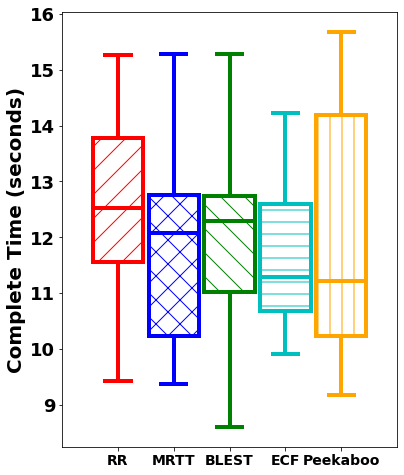

In [14]:
import matplotlib.pyplot as plt
import numpy as np

ct0 = [dataTotal['RR']]
ct1 = [dataTotal['MRTT']]
ct2 = [dataTotal['BLEST']]
ct3 = [dataTotal['ECF']]
ct4 = [dataTotal['PEEK']]
ct5 = [dataTotal['MAB']]

# ticks = ['dynamic2']
bar_width = 0.9
# create a boxplot for two arrays separately,
# the position specifies the location of the
# particular box in the graph,
# this can be changed as per your wish. Use width
# to specify the width of the plot

boxprops = dict(linestyle='-', linewidth=4)
whiskerprops = dict(linestyle='-', linewidth=4)
capprops = dict(linestyle='-', linewidth=4)
medianprops = dict(linestyle='-', linewidth=4)

plt.figure(figsize=(6,8))
ct_plot0 = plt.boxplot(ct0,positions=np.array(np.arange(len(ct0))),widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot0['boxes']:
    box.set(hatch = '/', fill=False) 
ct_plot1 = plt.boxplot(ct1,positions=np.array(np.arange(len(ct1)))+bar_width+0.1,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot1['boxes']:
    box.set(hatch = 'x', fill=False) 
ct_plot2 = plt.boxplot(ct2,positions=np.array(np.arange(len(ct2)))+bar_width*2+0.1*2,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot2['boxes']:
    box.set(hatch = '\\', fill=False) 
ct_plot3 = plt.boxplot(ct3,positions=np.array(np.arange(len(ct3)))+bar_width*3+0.1*3,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot3['boxes']:
    box.set(hatch = '-', fill=False)
ct_plot4 = plt.boxplot(ct4,positions=np.array(np.arange(len(ct4)))+bar_width*4+0.1*4,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
for box in ct_plot4['boxes']:
    box.set(hatch = '|', fill=False) 
# ct_plot5 = plt.boxplot(ct5,positions=np.array(np.arange(len(ct5)))+bar_width*5+0.1*5,widths=bar_width, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops = medianprops)
# for box in ct_plot5['boxes']:
#     box.set(hatch = '+', fill=False) 
    
    


def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
         
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label=label)
    # plt.legend()
 
 
# setting colors for each groups
define_box_properties(ct_plot0, 'red', 'RR')
define_box_properties(ct_plot1, 'blue', 'MRTT')
define_box_properties(ct_plot2, 'green', 'BLEST')
define_box_properties(ct_plot3, 'c', 'ECF')
define_box_properties(ct_plot4, 'orange', 'PEEK')
# define_box_properties(ct_plot5, 'orange', 'MAB')
 
# set the x label values
ticks = ['RR', 'MRTT', 'BLEST', 'ECF', 'Peekaboo']
plt.xticks([0,1,2,3,4], ticks)
# plt.tick_params(labelbottom = False, bottom = False)
plt.xticks(fontsize=14, fontweight='bold')  # 默认字体大小为10
plt.yticks(fontsize=18, fontweight='bold')
plt.ylabel("Complete Time (seconds)", fontsize=20, fontweight='bold')
# plt.xlabel("Scheduler", fontsize=20, fontweight='bold')
# set the limit for x axis
plt.xlim(-1, len(ticks))
 
# set the limit for y axis
# plt.ylim(0, 50)
 
# set the title
# plt.title('High Dynamicity')
# plt.savefig('./comTime_scheduler.pdf', format='pdf')
# plt.savefig('./comTime_scheduler.png', format='png')
plt.show()